In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
data1 = np.loadtxt("dataset1.csv")
nItems, nMonths = data1.shape

## 1.1 Plots

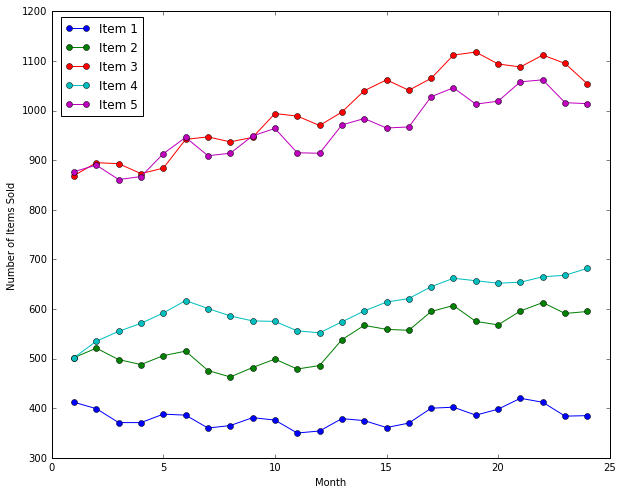

In [9]:
x = np.linspace(1, len(data1[0]), (len(data1[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.figure(figsize=(10,8))

for row in data1:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

## 1.2 Regression Model and Least Square Solvers

I implement a basis that models a linear trend and seasonal fluctuations (yearly, two-yearly and every 4 months).

In [48]:
def build_A(N):
    A = np.zeros((N, 8))
    for t in range(N):
        # sin and cos are used to implement seasonality and phase difference.
        A[t] = np.array([1.0, 1.0 * t, np.sin(2 * np.pi * t / 4), np.cos(2 * np.pi * t / 4),
                       np.sin(2 * np.pi * t / 12), np.cos(2 * np.pi * t / 12),
                       np.sin(2 * np.pi * t / 24), np.cos(2 * np.pi * t / 24)])
    return A

A = build_A(nMonths)

In [49]:
def least_norme(X, y):
    X_X = np.transpose(X).dot(X)
    X_y = np.transpose(X).dot(y)
    R_R = np.linalg.cholesky(X_X)
    w = np.linalg.solve(R_R, X_y)
    x = np.linalg.solve(np.transpose(R_R), w)
    return x

def least_qr(X, y):
    Q, R = np.linalg.qr(X)
    x = np.linalg.solve(R, np.transpose(Q).dot(y))
    return x

def least_svd(X, y):
    U,s,V_t = np.linalg.svd(X,False)
    U_y = np.transpose(U).dot(y)
    w = np.linalg.inv(np.diag(s)).dot(U_y)
    x = np.transpose(V_t).dot(w)
    return x

## 1.3 Predictions and Relative Errors

### 1.3.1 Solution with Normal Equations

In [50]:
norm_coeffs = []
norm_results = []
for item in data1:
    b = least_norme(A, item)
    norm_coeffs.append(b)
    regress = np.dot(A, b)
    norm_results.append(regress)

### 1.3.2 Solution with QR Decomposition

In [51]:
qr_coeffs = []
qr_results = []
for item in data1:
    b = least_qr(A, item)
    qr_coeffs.append(b)
    regress = np.dot(A, b)
    qr_results.append(regress)

### 1.3.3 Solution with SVD

In [52]:
svd_coeffs = []
svd_results = []
for item in data1:
    b = least_svd(A, item)
    svd_coeffs.append(b)
    regress = np.dot(A, b)
    svd_results.append(regress)

### 1.3.4 Regression Fit Plot of Results

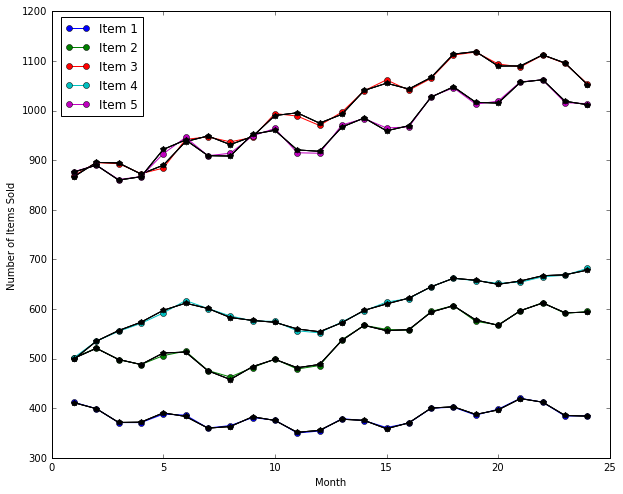

In [53]:
x = np.linspace(1, len(data1[0]), (len(data1[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.figure(figsize=(10,8))

for row in data1:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    plt.plot(x, norm_results[count], color = "k", marker = "|")
    plt.plot(x, qr_results[count], color = "k", marker = "*")
    plt.plot(x, svd_results[count], color = "k", marker = "p")
    count += 1
    
plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

All regression fits are nearly the same, you cannot see the difference on the plot.

### Predictions for next 6 months

In [54]:
A_predictions = np.zeros((6,8))
nPredictions = 6
for i in range(nPredictions):
    # sin and cos are used to implement seasonality and phase difference.
    t = i + nMonths
    A_predictions[i] = np.array([1.0, 1.0 * t, np.sin(2 * np.pi * t / 4), np.cos(2 * np.pi * t / 4),
                   np.sin(2 * np.pi * t / 12), np.cos(2 * np.pi * t / 12),
                   np.sin(2 * np.pi * t / 24), np.cos(2 * np.pi * t / 24)])

Error table for item 1
[[  0.00000000e+00   5.95400999e-14   5.76733720e-14]
 [  5.95400999e-14   0.00000000e+00   1.86672798e-15]
 [  5.76733720e-14   1.86672798e-15   0.00000000e+00]]
Error table for item 2
[[  0.00000000e+00   4.36378201e-14   4.41605803e-14]
 [  4.36378201e-14   0.00000000e+00   8.88951071e-16]
 [  4.41605803e-14   8.88951071e-16   0.00000000e+00]]
Error table for item 3
[[  0.00000000e+00   4.22427048e-14   3.78066046e-14]
 [  4.22427048e-14   0.00000000e+00   4.43610027e-15]
 [  3.78066046e-14   4.43610027e-15   0.00000000e+00]]
Error table for item 4
[[  0.00000000e+00   3.93900781e-14   3.84007628e-14]
 [  3.93900781e-14   0.00000000e+00   1.30943707e-15]
 [  3.84007628e-14   1.30943707e-15   0.00000000e+00]]
Error table for item 5
[[  0.00000000e+00   3.31902996e-14   3.71885734e-14]
 [  3.31902996e-14   0.00000000e+00   3.99827383e-15]
 [  3.71885734e-14   3.99827383e-15   0.00000000e+00]]


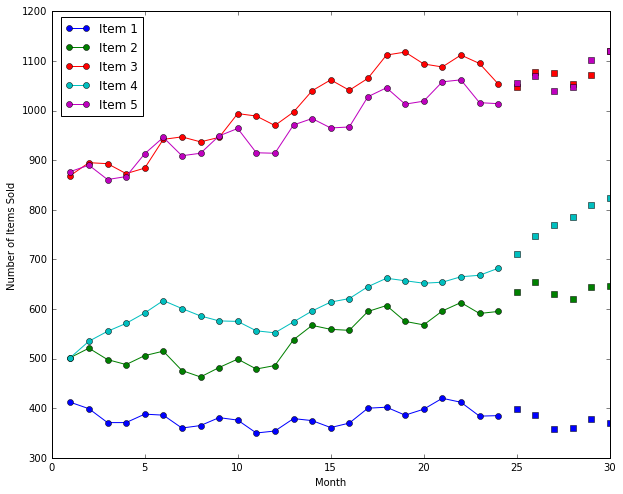

In [103]:
norm_preds = []
qr_preds = []
svd_preds = []

for i in range(nItems):
    E = np.zeros((3, 3))
    item_norm, item_qr, item_svd = [], [], []
    for j in range(nPredictions):
        yNormal = np.dot(A_predictions[j], norm_coeffs[i])
        yQR = np.dot(A_predictions[j], qr_coeffs[i])
        ySVD = np.dot(A_predictions[j], svd_coeffs[i])
        item_norm.append(yNormal)
        item_qr.append(yQR)
        item_svd.append(ySVD)
        E[0,1] += 1.0 * np.abs(yNormal - yQR) / yQR
        E[1,0] += 1.0 * np.abs(yQR - yNormal) / yNormal
        E[0,2] += 1.0 * np.abs(yNormal - ySVD) / ySVD
        E[2,0] += 1.0 * np.abs(ySVD - yNormal) / yNormal
        E[1,2] += 1.0 * np.abs(yQR - ySVD) / ySVD
        E[2,1] += 1.0 * np.abs(ySVD - yQR) / yQR
    norm_preds.append(item_norm)
    qr_preds.append(item_qr)
    svd_preds.append(item_svd)
    
    print("Error table for item %s" % (i + 1))
    print(np.matrix(E))
    
x = np.linspace(1, len(data1[0]), (len(data1[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.figure(figsize=(10,8))

for row in data1:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1
    
pred_x = np.linspace(nMonths + 1, nMonths + 6, 6)
for i in range(nItems):
    plt.plot(pred_x, qr_preds[i], colors[i] + "s")

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

### 1.4 project1 function

In [170]:
def project1(salesdata, testdata = None, months_to_predict = 6):
    A = build_A(len(salesdata[0]))
    # Solve with QR
    qr_coeffs = []
    qr_results = []
    for item in salesdata:
        b = least_qr(A, item)
        qr_coeffs.append(b)
        regress = np.dot(A, b)
        qr_results.append(regress)
    A_predictions = np.zeros((months_to_predict, 8))
    for i in range(months_to_predict):
        # sin and cos are used to implement seasonality and phase difference.
        t = i + nMonths
        A_predictions[i] = np.array([1.0, 1.0 * t, np.sin(2 * np.pi * t / 4), np.cos(2 * np.pi * t / 4),
                       np.sin(2 * np.pi * t / 12), np.cos(2 * np.pi * t / 12),
                       np.sin(2 * np.pi * t / 24), np.cos(2 * np.pi * t / 24)])
        
    predictions = np.zeros((len(salesdata), months_to_predict))
    for i in range(len(salesdata)):
        prediction = np.dot(A_predictions, qr_coeffs[i])
        predictions[i] = prediction
    
    if testdata is not None:
        print("Errors (Euclidian norms)")
        for j in range(len(salesdata)):
            print("Item %d: %.4f" % ((j+1), np.linalg.norm(predictions[j,:] - testdata[j,:])))
    else:
        for j in range(len(salesdata)):
            print("Item %d: " % (j+1), predictions[j])

### 1.4.1 project1 function test

In [172]:
project1(data1)

Item 1:  [ 398.43962295  386.35447492  358.57893734  359.19057805  377.94709037
  370.71707153]
Item 2:  [ 633.50728676  653.6405252   631.01725399  620.91576101  644.19228316
  645.98079773]
Item 3:  [ 1048.53632354  1077.35221848  1076.31760248  1053.79551944  1071.75656889
  1119.26273192]
Item 4:  [ 710.27254869  746.88893802  768.37105119  785.14142267  809.14120867
  823.46083433]
Item 5:  [ 1056.10982156  1070.03303123  1039.9110287   1046.71755169  1101.83413901
  1120.93041073]


## 1.6 Regression from past data

In [248]:
import math

def project_part2(tau, salesdata, testdata = None):
    X = np.loadtxt(salesdata)
    # fill missing values
    for row in X:
        for i in range(len(row)):
            if math.isnan(row[i]):
                total = 0
                count = 0
                if i != 0:
                    if not math.isnan(row[i-1]):
                        total += row[i-1]
                        count += 1
                if i != len(row)-1:
                    if not math.isnan(row[i+1]):
                        total += row[i+1]
                        count += 1
                row[i] = 1.0 * total / count
    
    nItems, nTime = X.shape

In [249]:
project_part2(2,"dataset2.csv")

I didn't do the regression from past data part in time.